## Random Forest Classification: Enterococcus_faecalis_Infection_Data

### A random forest model is made of multiple decision trees. It combines their output to reach a single result. 

## Imports

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Dataset

In [2]:
# Import data
data = pd.read_csv("/Users/taniarizwan/Documents/University/Third Year 2022/Bmen 415/Project/Enterococcus_faecalis_Infection_Data.csv")
data = data.iloc[1:]
data.dropna(inplace=True)

#Convert columns to int
data["SevenDay_Death"] = data["SevenDay_Death"].astype(int)
data["ThirtyDay_Death"] = data["ThirtyDay_Death"].astype(int)
data["SixWeek_Death"] = data["SixWeek_Death"].astype(int)
data["ThreeMo_Death"] = data["ThreeMo_Death"].astype(int)
data["SixMo_Death"] = data["SixMo_Death"].astype(int)
data["NineMo_Death"] = data["NineMo_Death"].astype(int)
data["OneYear_Death"] = data["OneYear_Death"].astype(int)

data.replace(to_replace ="00-10", value = "5", inplace = True)
data.replace(to_replace ="11-20", value = "15.5", inplace = True)
data.replace(to_replace ="21-30", value = "25.5", inplace = True)
data.replace(to_replace ="31-40", value = "35.5", inplace = True)
data.replace(to_replace ="41-50", value = "45.5", inplace = True)
data.replace(to_replace ="51-60", value = "55.5", inplace = True)
data.replace(to_replace ="61-70", value = "65.5", inplace = True)
data.replace(to_replace ="71-80", value = "75.5", inplace = True)
data.replace(to_replace ="81-90", value = "85.5", inplace = True)
data.replace(to_replace ="80+", value = "80", inplace = True)

del data['Unnamed: 0']

data

,AGE_GRP,SevenDay_Death,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2064,Protein 2065,Protein 2066,Protein 2067,Protein 2068,Protein 2069,Protein 2070,Protein 2071,Protein 2072,Protein 2073
1,55.5,0,0,0,0,0,0,0,1.0,0.110355,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,0,1,1,1,1,1,1,5.0,-0.036816,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75.5,1,1,1,1,1,1,1,2.0,-0.162532,...,2.071827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,0,0,0,0,0,0,0,2.0,-0.097824,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,55.5,0,0,0,0,1,1,1,2.0,-0.159146,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,80,0,1,1,1,1,1,1,3.0,0.236907,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1323,80,0,0,0,0,1,1,1,1.0,-0.086171,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,75.5,0,0,0,0,0,0,0,0.0,-0.167347,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,65.5,0,0,0,0,0,0,0,2.0,0.076349,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [3]:
final_data = data.drop(["SevenDay_Death", "ThirtyDay_Death", "SixWeek_Death", "ThreeMo_Death", "SixMo_Death", "NineMo_Death"], axis=1)
y = final_data['OneYear_Death'] # Target

X=final_data.loc[:,final_data.columns!="OneYear_Death"] # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=142)

## Random Forest 

In [4]:
# Fitting model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [5]:
# Performance - Training
f1_train = f1_score(y_train,y_pred_train )
score_train = rf.score(X_train, y_train)*100
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training F1 :", f1_train)
print("Training, RF Score:", score_train)
print("Training Accuracy:", accuracy_train)

Training F1 : 1.0
Training, RF Score: 100.0
Training Accuracy: 1.0


In [6]:
# Performance - Testing
f1_test = f1_score(y_test, y_pred_test)
score_test = rf.score(X_test, y_test)*100
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing F1:", f1_test)
print("Testing, RF Score:", score_test)
print("Testing Accuracy:", accuracy_test)

Testing F1: 0.1764705882352941
Testing, RF Score: 69.64769647696477
Testing Accuracy: 0.6964769647696477


## Visualization

[[245  11]
 [101  12]]


Text(0.5, 257.44, 'Predicted Death(1Y)')

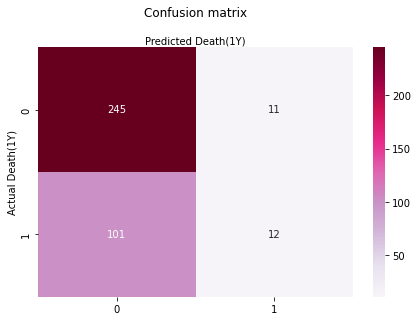

In [7]:
# Eval with Conf Matrix

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)

# Visualize 
# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Death(1Y)')
plt.xlabel('Predicted Death(1Y)')

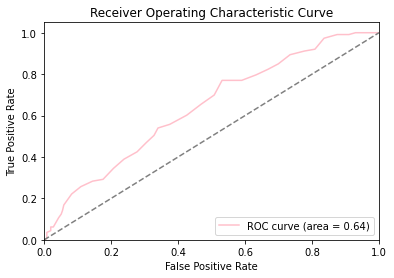

In [8]:
# ROC Curve (binary classification)
y_pred_proba = rf.predict_proba(X_test)[:,1]

# Calculate the FPR and TPR at various probability cutoffs
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, color='pink', label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Source: https://www.datacamp.com/tutorial/random-forests-classifier-python